In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

import seaborn as sns
sns.set_palette('Set2')
sns.set_style(style = 'darkgrid')
import matplotlib.pyplot as plt
plt.figure(figsize = (8,5))

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

In [2]:
chai = pd.read_csv('/Users/chaitanyakumarmadari/Downloads/Crime-Data.csv')

In [3]:
chai.shape

(276529, 15)

In [4]:
chai.columns

Index(['CrimeDate', 'CrimeTime', 'CrimeCode', 'Location', 'Description',
       'Inside/Outside', 'Weapon', 'Post', 'District', 'Neighborhood',
       'Longitude', 'Latitude', 'Location 1', 'Premise', 'Total Incidents'],
      dtype='object')

In [5]:
chai.describe()

,Post,Longitude,Latitude,Total Incidents
count,276305.000000,274325.000000,274325.000000,276529.0
mean,506.256821,-76.617444,39.307399,1.0
std,260.735370,0.042306,0.029556,0.0
min,2.000000,-76.711620,39.200410,1.0
25%,243.000000,-76.648460,39.288330,1.0
50%,511.000000,-76.613960,39.303640,1.0
75%,731.000000,-76.587440,39.327810,1.0
max,945.000000,-76.528500,39.372930,1.0


In [6]:
chai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276529 entries, 0 to 276528
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CrimeDate        276529 non-null  object 
 1   CrimeTime        276529 non-null  object 
 2   CrimeCode        276529 non-null  object 
 3   Location         274322 non-null  object 
 4   Description      276529 non-null  object 
 5   Inside/Outside   266250 non-null  object 
 6   Weapon           95577 non-null   object 
 7   Post             276305 non-null  float64
 8   District         276449 non-null  object 
 9   Neighborhood     273789 non-null  object 
 10  Longitude        274325 non-null  float64
 11  Latitude         274325 non-null  float64
 12  Location 1       274325 non-null  object 
 13  Premise          265772 non-null  object 
 14  Total Incidents  276529 non-null  int64  
dtypes: float64(3), int64(1), object(11)
memory usage: 31.6+ MB


In [7]:
chai.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,Total Incidents
0,09/02/2017,23:30:00,3JK,4200 AUDREY AVE,ROBBERY - RESIDENCE,I,KNIFE,913.0,SOUTHERN,Brooklyn,-76.60541,39.22951,"(39.2295100000, -76.6054100000)",ROW/TOWNHO,1
1,09/02/2017,23:00:00,7A,800 NEWINGTON AVE,AUTO THEFT,O,NaN,133.0,CENTRAL,Reservoir Hill,-76.63217,39.31360,"(39.3136000000, -76.6321700000)",STREET,1
2,09/02/2017,22:53:00,9S,600 RADNOR AV,SHOOTING,Outside,FIREARM,524.0,NORTHERN,Winston-Govans,-76.60697,39.34768,"(39.3476800000, -76.6069700000)",Street,1
3,09/02/2017,22:50:00,4C,1800 RAMSAY ST,AGG. ASSAULT,I,OTHER,934.0,SOUTHERN,Carrollton Ridge,-76.64526,39.28315,"(39.2831500000, -76.6452600000)",ROW/TOWNHO,1
4,09/02/2017,22:31:00,4E,100 LIGHT ST,COMMON ASSAULT,O,HANDS,113.0,CENTRAL,Downtown West,-76.61365,39.28756,"(39.2875600000, -76.6136500000)",STREET,1


# DATA CLEANING

In [8]:
null_count = chai.isnull().sum()
null_prop = null_count / len(chai)
pd.DataFrame({
    'Count': null_count,
    'Proportion': null_prop})

,Count,Proportion
CrimeDate,0,0.000000
CrimeTime,0,0.000000
CrimeCode,0,0.000000
Location,2207,0.007981
Description,0,0.000000
Inside/Outside,10279,0.037172
Weapon,180952,0.654369
Post,224,0.000810
District,80,0.000289
Neighborhood,2740,0.009909


In [9]:
chai0 = chai[chai['Weapon'].isnull()]

/var/folders/2y/7j1vppb54pd0g0n2mbf67_540000gn/T/ipykernel_20209/2288845921.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


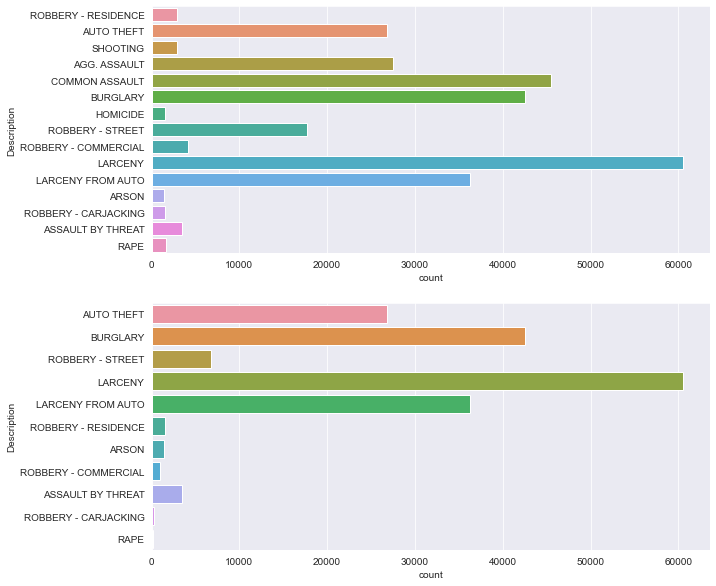

In [10]:
fig, ax = plt.subplots(2,1)
sns.countplot(y = chai['Description'], ax = ax[0])
sns.countplot(y= chai0['Description'], ax = ax[1])
fig.set_size_inches(10,10)
fig.show()

In [11]:
chai['Weapon'].fillna('NO WEAPON', inplace = True)

In [12]:
chai['CrimeTime'] = chai['CrimeTime'].str.replace('24:00:00', '00:00:00')

In [14]:
chai['Date'] = chai['CrimeDate'] + ' ' + chai['CrimeTime']
chai['Date'] = pd.to_datetime(chai['Date'])

In [15]:
chai['Day'] = chai['Date'].dt.day
chai['Month'] = chai['Date'].dt.month
chai['Year'] = chai['Date'].dt.year
chai['Weekday'] = chai['Date'].dt.weekday + 1
chai['Hour'] = chai['Date'].dt.hour

In [16]:
chai= chai.drop(['CrimeDate', 'CrimeTime'], axis = 1)

In [17]:
chai = chai.set_index('Date')

In [18]:
chai['Inside/Outside'].value_counts()
chai['Inside/Outside'] = chai['Inside/Outside'].replace('I', 'Inside')
chai['Inside/Outside'] = chai['Inside/Outside'].replace('O', 'Outside')

# DATA VISUALIZATION

[]

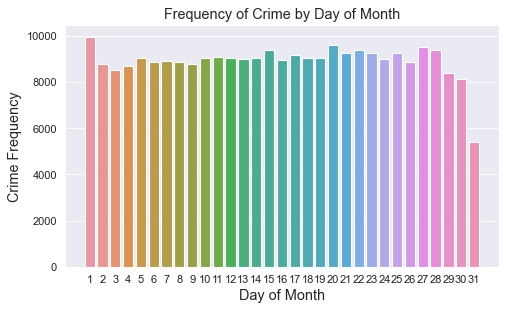

In [19]:
plt.figure(figsize=(7,4), dpi=80)

plt.title('Frequency of Crime by Day of Month', fontsize=13)
ax = sns.countplot(x = 'Day', data = chai)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('Day of Month', fontsize=13)
plt.plot()

[]

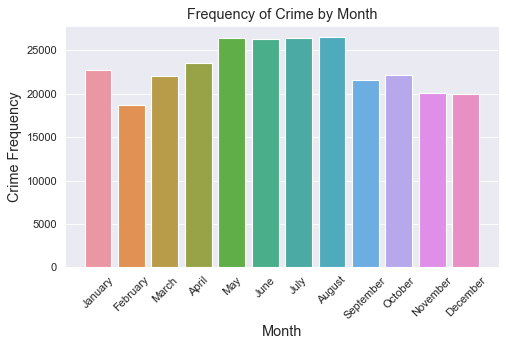

In [20]:
plt.figure(figsize=(7,4), dpi=80)

plt.title('Frequency of Crime by Month', fontsize=13)
ax = sns.countplot(x = 'Month', data = chai)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('Month', fontsize=13)
plt.xticks(rotation = 45)
labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] 
ax.set_xticklabels(labels)
plt.plot()

[]

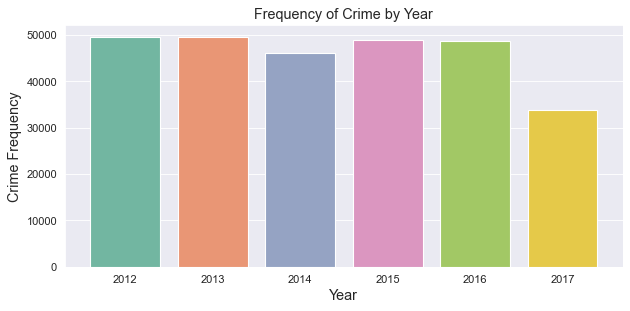

In [21]:
plt.figure(figsize=(9,4), dpi=80)

plt.title('Frequency of Crime by Year', fontsize=13)
ax = sns.countplot(x = 'Year', data = chai)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('Year', fontsize=13)
plt.plot()

[]

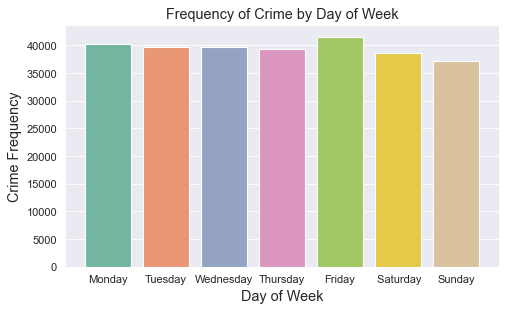

In [22]:
plt.figure(figsize=(7,4), dpi=80)

plt.title('Frequency of Crime by Day of Week', fontsize=13)
ax = sns.countplot(x = 'Weekday', data = chai)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('Day of Week', fontsize=13)
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',' Saturday', 'Sunday']
ax.set_xticklabels(labels)
plt.plot()

[]

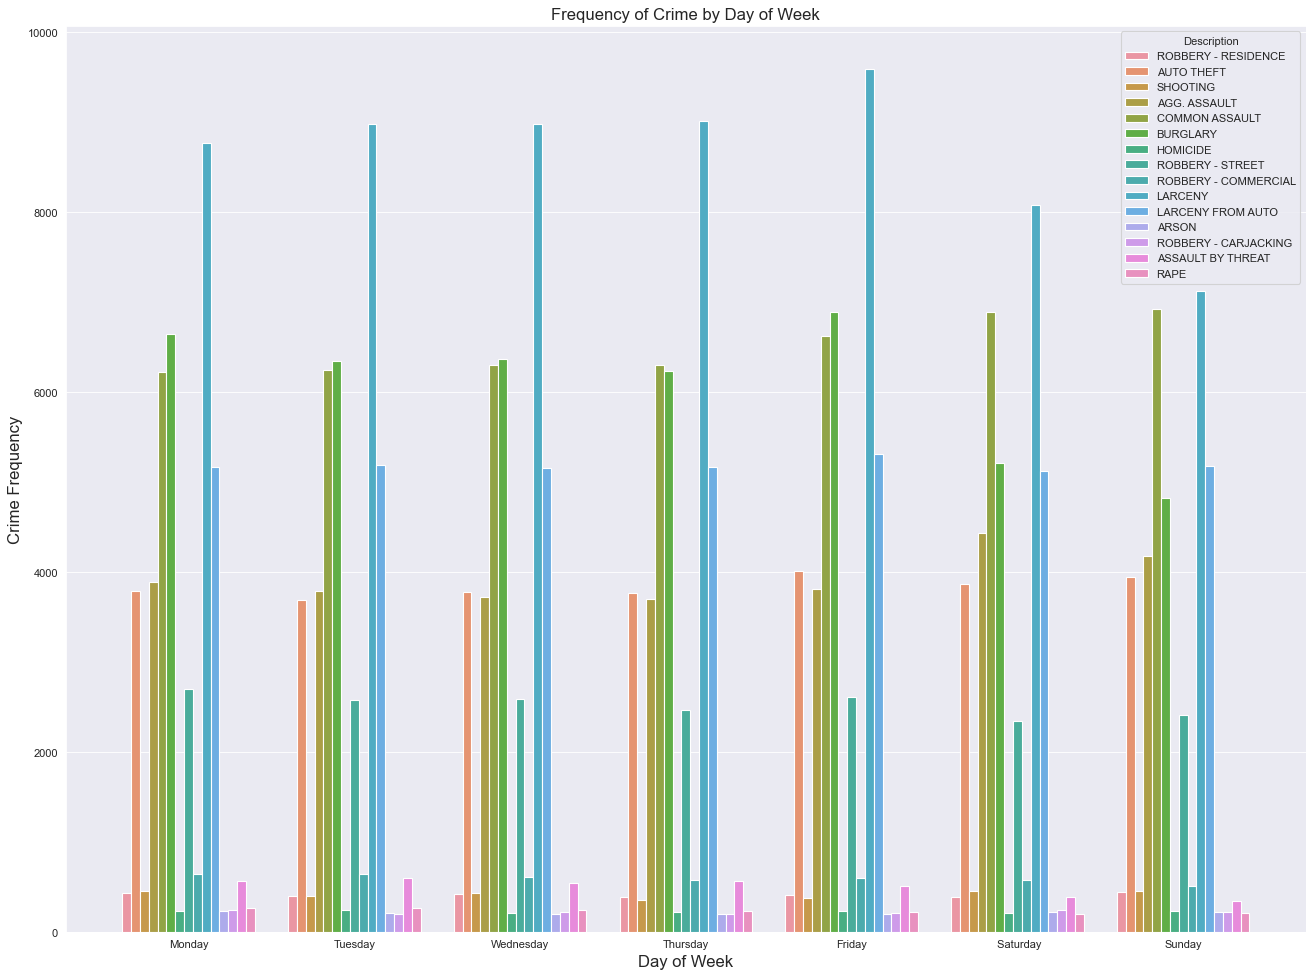

In [23]:
plt.figure(figsize=(20,15), dpi=80)

plt.title('Frequency of Crime by Day of Week', fontsize=15)
ax = sns.countplot(x = 'Weekday', hue = 'Description', data = chai)
plt.ylabel("Crime Frequency", fontsize=15)
plt.xlabel('Day of Week', fontsize=15)
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',' Saturday', 'Sunday']
ax.set_xticklabels(labels)
plt.plot()

[]

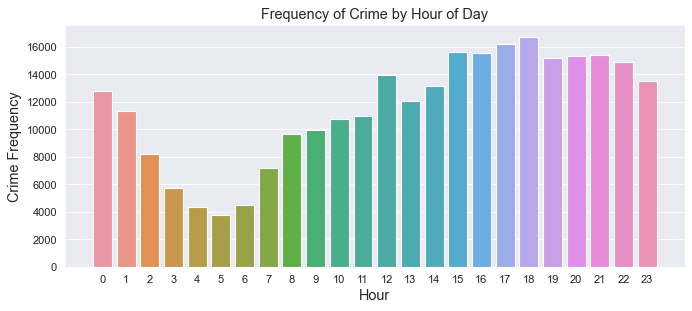

In [24]:
plt.figure(figsize=(10,4), dpi=80)

plt.title('Frequency of Crime by Hour of Day', fontsize=13)
ax = sns.countplot(x = 'Hour', data = chai)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('Hour', fontsize=13)
plt.plot()

[]

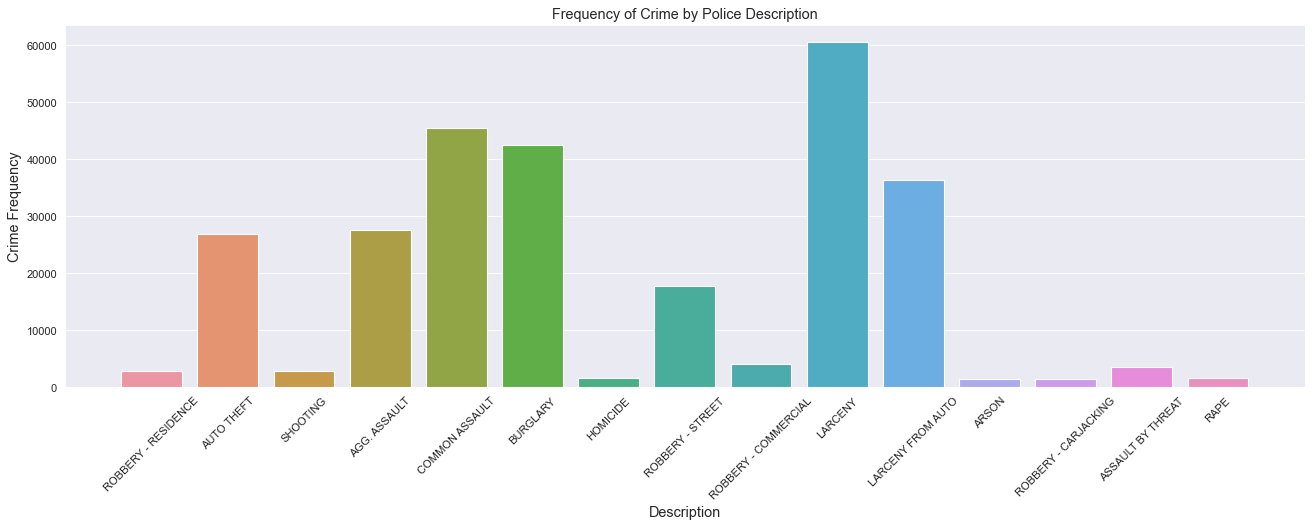

In [25]:
plt.figure(figsize=(20,6), dpi=80)

plt.title('Frequency of Crime by Police Description', fontsize=13)
ax = sns.countplot(x = 'Description', data = chai)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('Description', fontsize=13)
plt.xticks(rotation = 45)
plt.plot()

[]

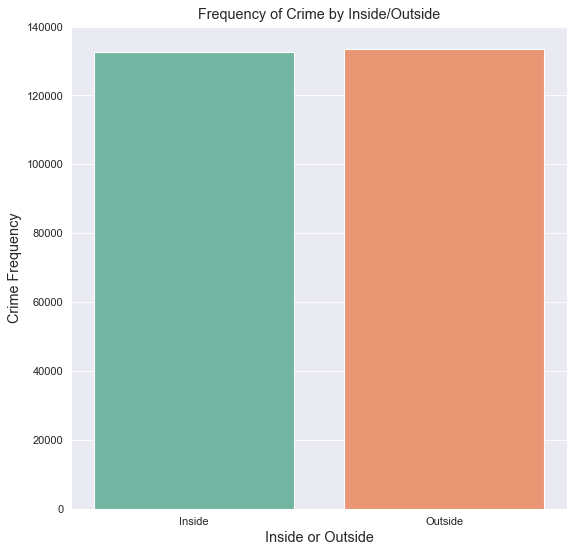

In [26]:
plt.figure(figsize=(8,8), dpi=80)

plt.title('Frequency of Crime by Inside/Outside', fontsize=13)
ax = sns.countplot(x = 'Inside/Outside', data = chai)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('Inside or Outside', fontsize=13)
plt.plot()

[]

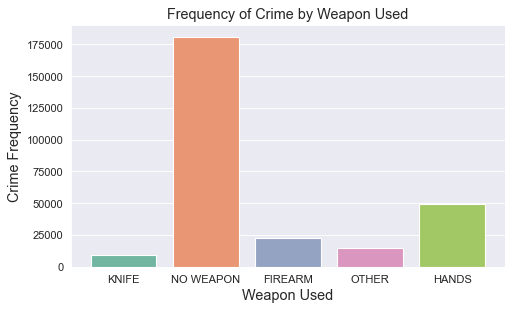

In [27]:
plt.figure(figsize=(7,4), dpi=80)

plt.title('Frequency of Crime by Weapon Used', fontsize=13)
ax = sns.countplot(x = 'Weapon', data = chai)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('Weapon Used', fontsize=13)
plt.plot()

[]

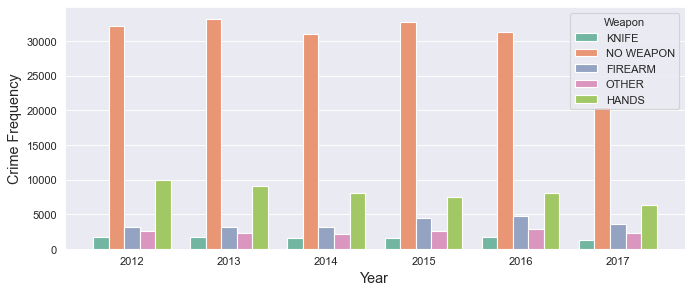

In [28]:
plt.figure(figsize = (10, 4), dpi = 80)

ax = sns.countplot(x = "Year", hue = "Weapon", data = chai)
plt.ylabel("Frequency of Crime per Year Grouped by Weapon Used", fontsize = 13)
plt.ylabel("Crime Frequency", fontsize = 13)
plt.xlabel("Year", fontsize = 13)
plt.plot()

[]

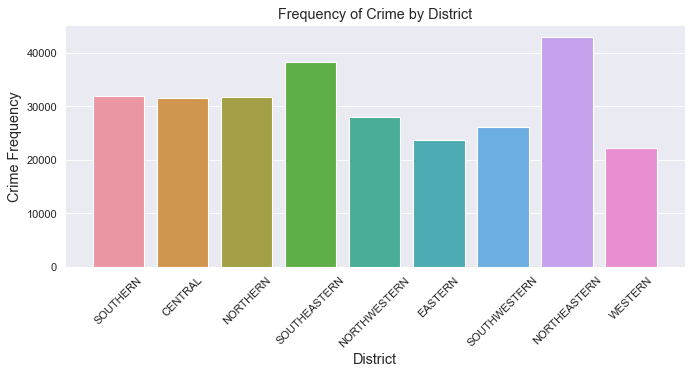

In [29]:
plt.figure(figsize=(10,4), dpi=80)

plt.title('Frequency of Crime by District', fontsize=13)
ax = sns.countplot(x = 'District', data = chai)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('District', fontsize=13)
plt.xticks(rotation = 45)
plt.plot()

[]

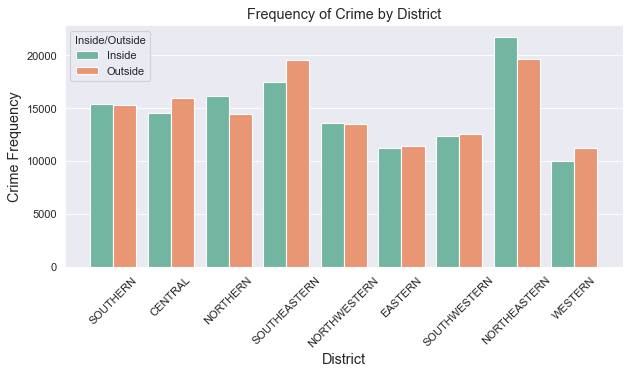

In [30]:
plt.figure(figsize=(9,4), dpi=80)

plt.title('Frequency of Crime by District', fontsize=13)
ax = sns.countplot(x = 'District', hue = 'Inside/Outside', data = chai)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('District', fontsize=13)
plt.xticks(rotation = 45)
plt.plot()

# Folium map to find latitude and longitude 

In [36]:
import folium
from folium.plugins import HeatMap

In [37]:
chai = chai[pd.notnull(chai['Latitude'])]
chai = chai[pd.notnull(chai['Longitude'])]


In [38]:
chai['Latitude'].median()

39.30364

In [39]:
chai['Longitude'].median()

-76.61396

In [40]:
def generateBaseMap(default_location = [39.30364, -76.6139599], default_zoom_start = 12):
    base_map = folium.Map(location = default_location, control_scale = True, zoom_start = default_zoom_start)
    return base_map

In [41]:
base_map = generateBaseMap()

In [42]:
chai['count'] = 1

In [43]:
chai_murder = chai[chai['Description'] == 'HOMICIDE']

In [45]:
HeatMap(
        data = chai_murder[['Latitude', 'Longitude', 'count']].groupby(
            ['Latitude', 'Longitude']).sum().reset_index().values.tolist(),
        radius = 8,
        max_zoom = 13).add_to(base_map)
base_map